In [1]:
import os 
import numpy as np
import pandas as pd

import seaborn as sns
!pip install plotly
!pip install yellowbrick
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")





### READ DATA

In [2]:
data = pd.read_csv("./data/data.csv")

In [3]:
genre_data = pd.read_csv("./data/data_by_genres.csv")

In [4]:
year_data = pd.read_csv("./data/data_by_year.csv")

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [6]:
print(genre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [7]:
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


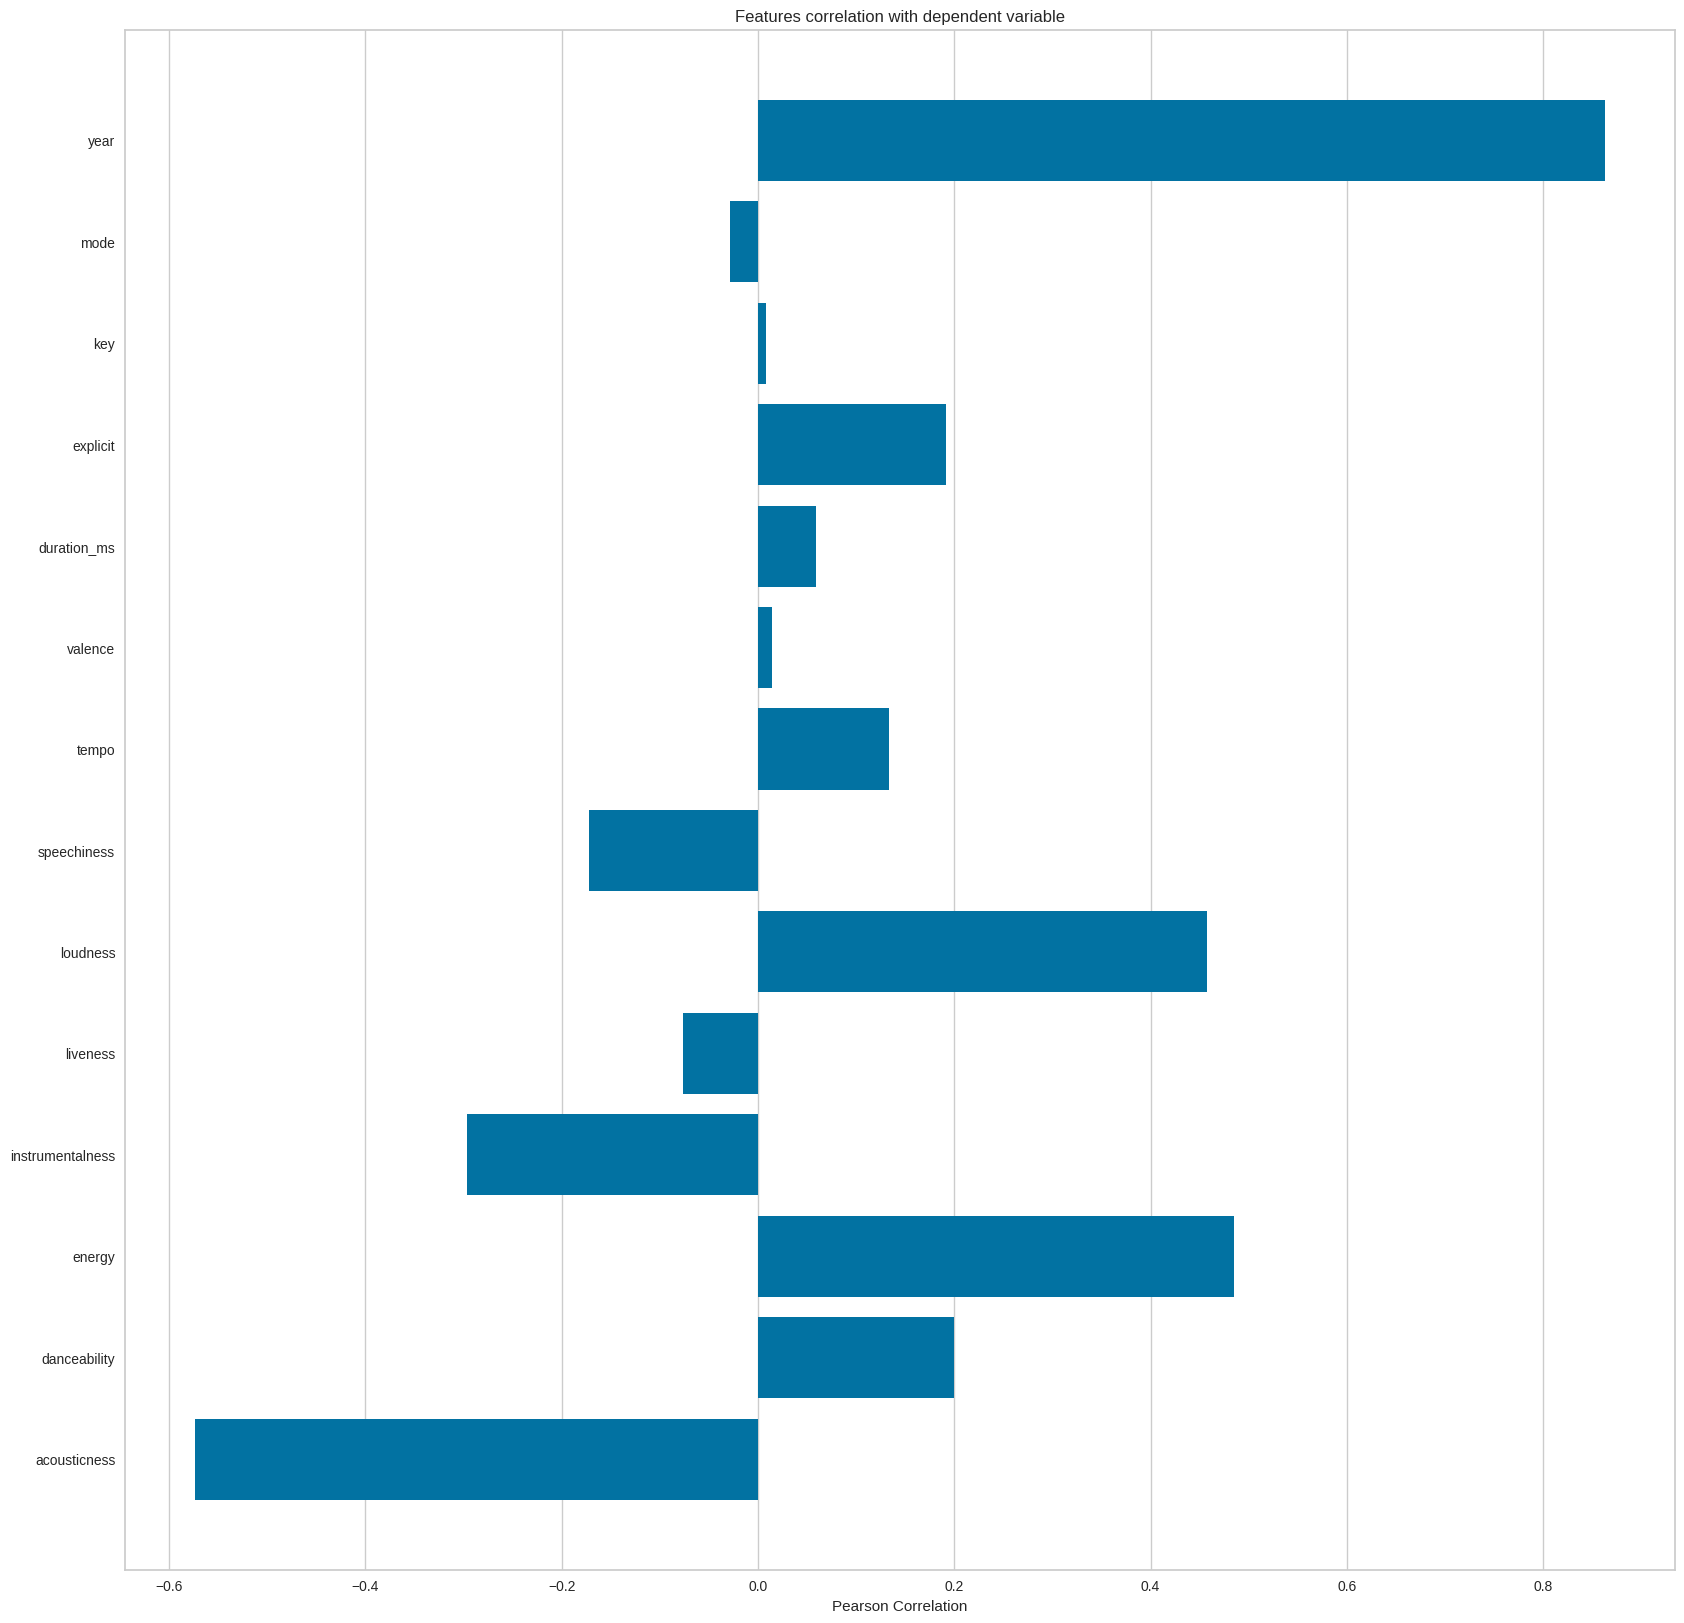

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [8]:
import yellowbrick
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

<Axes: xlabel='decade', ylabel='count'>

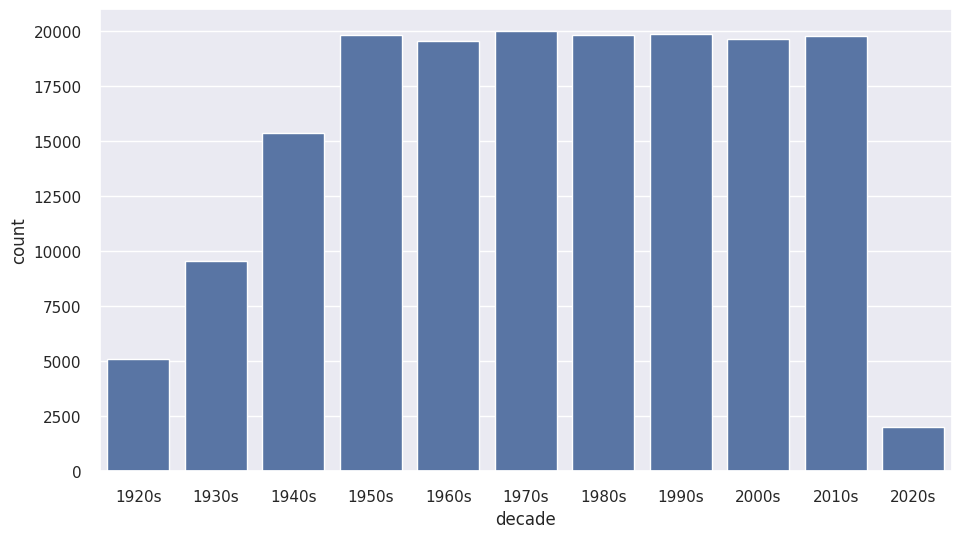

In [9]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(x='decade',data=data)

In [10]:
import nbformat
print(nbformat.__version__)

5.10.4


In [11]:
# Install or upgrade nbformat
!pip install --upgrade nbformat
!pip install --upgrade jupyter jupyterlab notebook

In [12]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
!pip install --upgrade nbformat
fig.show()


In [13]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

In [15]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.006s...
[t-SNE] Computed neighbors for 2973 samples in 0.454s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.105995
[t-SNE] KL divergence after 1000 iterations: 1.394418


In [16]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=False))
                                 ], verbose=False)

X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

In [ ]:
# Visualizing the Clusters with PCA

from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data['name']
projection['cluster'] = data['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from collections import defaultdict

# Load your dataset (assuming you already have it loaded as `spotify_data`)
# spotify_data = pd.read_csv('path_to_your_data.csv')

# Numerical columns used for similarity calculation
number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 
               'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 
               'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

# Scaling numerical columns
scaler = StandardScaler()
spotify_data_scaled = scaler.fit_transform(data[number_cols])

# Function to get song data from the dataset
def get_song_data(song_name, song_year, data):
    try:
        song_data = data[(data['name'] == song_name) & (data['year'] == song_year)].iloc[0]
        return song_data
    except IndexError:
        return None

# Function to get the mean vector of the input song list
def get_mean_vector(song_list, data):
    song_vectors = []
    for song in song_list:
        song_data = get_song_data(song['name'], song['year'], data)
        if song_data is None:
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)
    return np.mean(song_vectors, axis=0)

# Function to recommend songs
def recommend_songs(song_list, data, n_songs=10):
    metadata_cols = ['name', 'year', 'artists']
    
    # Get the mean vector of the input songs
    song_center = get_mean_vector(song_list, data)
    song_center_scaled = scaler.transform(song_center.reshape(1, -1))
    
    # Calculate the cosine distance between the input songs and all songs in the dataset
    distances = pairwise_distances(song_center_scaled, spotify_data_scaled, metric='cosine').flatten()
    
    # Get indices of the closest songs
    index = np.argsort(distances)[:n_songs]
    
    # Return the recommended songs excluding the input songs
    rec_songs = data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin([song['name'] for song in song_list])]
    
    return rec_songs[metadata_cols]

# Example usage
song_list = [{'name': 'Bye Bye Blues', 'year': 1924}]
recommended_songs = recommend_songs(song_list, data, n_songs=5)
print(recommended_songs)
